In [1]:
from skimage.color import rgb2hsv
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pickle as pkl
import cv2

Using TensorFlow backend.


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



In [4]:
os.getcwd()

'C:\\Users\\abelp\\machine_learning\\crowd_count'

In [5]:
cwd = os.getcwd()

In [6]:
os.listdir(cwd+ '\\color_data')

['count_.csv', 'frames']

In [7]:
target = pd.read_csv(cwd + '\\color_data\\count_.csv', names=['target'])

In [8]:
target

,target
0,29
1,30
2,35
3,31
4,26
...,...
1995,27
1996,27
1997,25
1998,26


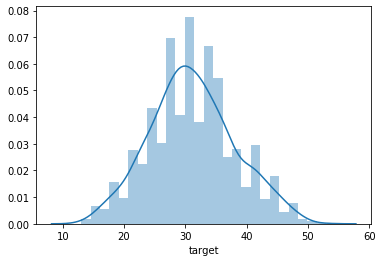

In [9]:
sns.distplot(target['target'])
plt.show()

In [10]:
frames = os.listdir(cwd + '\\color_data\\frames\\')

In [11]:
frames[-1]

'seq_002000.jpg'

In [12]:
input_ = []

In [13]:
for x in frames:
    input_.append(plt.imread(cwd + '\\color_data\\frames\\' + x))

In [14]:
input_ = np.array(input_)

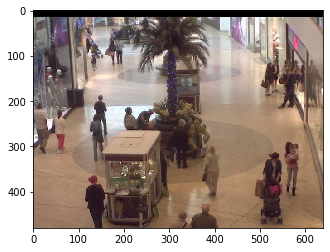

In [15]:
plt.imshow(input_[0])

In [16]:
input_.shape

(2000, 480, 640, 3)

In [17]:
#input_2 = np.expand_dims(input_, axis=4)

In [18]:
input_2 = input_

In [19]:
input_2.shape

(2000, 480, 640, 3)

In [20]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Lambda
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.layers import SpatialDropout2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle as pkl
import re
import copy
import time

In [21]:
IMG_SIZE = input_2.shape[1]
IMG_SIZE2 = input_2.shape[2]

In [22]:
print (IMG_SIZE)
print (IMG_SIZE2)

480
640


In [23]:
"""model = Sequential()

#model.add(BatchNormalization())
#add batch normalization prior to convolution
#add dropout for the dense layer

model.add(Lambda(lambda x: x/127.5-1.0, input_shape=(IMG_SIZE, IMG_SIZE2,3)))

model.add(Conv2D(228, kernel_size=(7,7), activation='relu',  input_shape=(IMG_SIZE, IMG_SIZE2, 3)))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Dropout(0.3))

model.add(Conv2D(528, kernel_size = (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Dropout(0.3))

#model.add(Conv2D(528, kernel_size = (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Conv2D(228, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(SpatialDropout2D(0.2))

model.add(Conv2D(178, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

#model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(128, activation = 'linear'))
#model.add(Dense(256, activation = 'linear'))

#keras.layers.LeakyReLU(alpha=0.3



#model.add(Dropout(0.3))

model.add(Dense(1, activation = 'linear'))"""

"model = Sequential()\n\n#model.add(BatchNormalization())\n#add batch normalization prior to convolution\n#add dropout for the dense layer\n\nmodel.add(Lambda(lambda x: x/127.5-1.0, input_shape=(IMG_SIZE, IMG_SIZE2,3)))\n\nmodel.add(Conv2D(228, kernel_size=(7,7), activation='relu',  input_shape=(IMG_SIZE, IMG_SIZE2, 3)))\nmodel.add(MaxPooling2D(pool_size=(4,4)))\n\nmodel.add(Dropout(0.3))\n\nmodel.add(Conv2D(528, kernel_size = (4, 4), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(3,3)))\n\nmodel.add(Dropout(0.3))\n\n#model.add(Conv2D(528, kernel_size = (3, 3), activation='relu'))\n#model.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Dropout(0.3))\n\nmodel.add(Conv2D(228, kernel_size = (2, 2), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#model.add(SpatialDropout2D(0.2))\n\nmodel.add(Conv2D(178, kernel_size = (2, 2), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(3,3)))\n\n#model.add(Dropout(0.6))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(128, act

In [24]:

#AlexNet

model = Sequential()

model.add(Lambda(lambda x: x/127.5-1.0, input_shape=(IMG_SIZE, IMG_SIZE2,3)))

# 1st Convolutional Layer
model.add(Conv2D(filters=96,  kernel_size=(11,11), strides=(4,4), padding='valid',  activation='relu'))

# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer

model.add(Dropout(0.5))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid',  activation='relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation

model.add(Dropout(0.5))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid',  activation='relu'))

# Batch Normalisation


# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid',  activation='relu'))

# Batch Normalisation

model.add(Dropout(0.5))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid',  activation='relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation




# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer



# 2nd Dense Layer
model.add(Dense(4096, activation='relu'))

# Add Dropout

# Batch Normalisation


# 3rd Dense Layer
model.add(Dense(1000,activation='relu'))

# Add Dropout


# Output Layer
model.add(Dense(1))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.compile(optimizer='ADAM',
              loss='mse',
              metrics=['mse'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 480, 640, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 96)      34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 59, 79, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 69, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 34, 256)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 34, 256)       0         
__________

In [27]:
input_2.shape

(2000, 480, 640, 3)

In [28]:
target = np.array(target['target'])

In [29]:
target

array([29, 30, 35, ..., 25, 26, 26], dtype=int64)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(input_2, target, test_size=0.2, random_state=42)

In [31]:
#X_train = np.expand_dims(X_train, axis=4)
#X_test = np.expand_dims(X_test, axis=4)

In [32]:
del input_2

In [33]:
y_train[0:1]

array([47], dtype=int64)

In [34]:
def data_Generator():
    while True:
        for i in range(0,len(X_train) // 100):
            yield  X_train[i*5:(i+1)*5], y_train[i*5:(i+1)*5]

In [35]:
es_callback = EarlyStopping(monitor='val_loss', patience=3)
callbacks=[es_callback],

In [36]:
history =  model.fit_generator(data_Generator(), steps_per_epoch=100, epochs=120,  verbose=1, validation_data=(X_test, y_test))



Epoch 1/120


100/100 [==============================] - 32s 317ms/step - loss: 3549.4881 - mean_squared_error: 3549.4881 - val_loss: 232.5811 - val_mean_squared_error: 232.5811
Epoch 2/120
100/100 [==============================] - 22s 219ms/step - loss: 59.1060 - mean_squared_error: 59.1060 - val_loss: 256.0067 - val_mean_squared_error: 256.0067401 - mean_squared_e - ETA: 11s - loss: 60.4169 - ETA: 7s - loss: 58.6304 - mean_squared_er - ETA: 6s - l - ETA: 2s - loss: 60.0597 - mean_squared_er - ETA: 1s - loss: 58.6428 - mean_squared_erro - ETA: 0s - loss: 59.6907 - mean_squared_erro
Epoch 3/120
100/100 [==============================] - 22s 217ms/step - loss: 38.1951 - mean_squared_error: 38.1951 - val_loss: 111.3161 - val_mean_squared_error: 111.3161
Epoch 4/120
100/100 [==============================] - 22s 216ms/step - loss: 36.7671 - mean_squared_error: 36.7671 - val_loss: 291.8781 - val_mean_squared_error: 291.8781
Epoch 5/120
100/100 [==============================] - 22s 217m

100/100 [==============================] - 22s 216ms/step - loss: 16.3038 - mean_squared_error: 16.3038 - val_loss: 45.7588 - val_mean_squared_error: 45.7588
Epoch 41/120
100/100 [==============================] - 22s 216ms/step - loss: 14.2897 - mean_squared_error: 14.2897 - val_loss: 122.0458 - val_mean_squared_error: 122.0458
Epoch 42/120
100/100 [==============================] - 22s 215ms/step - loss: 15.0869 - mean_squared_error: 15.0869 - val_loss: 108.4505 - val_mean_squared_error: 108.4505
Epoch 43/120
100/100 [==============================] - 22s 216ms/step - loss: 18.4683 - mean_squared_error: 18.4683 - val_loss: 92.8878 - val_mean_squared_error: 92.8878
Epoch 44/120
100/100 [==============================] - 22s 219ms/step - loss: 16.1635 - mean_squared_error: 16.1635 - val_loss: 70.7942 - val_mean_squared_error: 70.7942
Epoch 45/120
100/100 [==============================] - 22s 219ms/step - loss: 8.6454 - mean_squared_error: 8.6454 - val_loss: 99.8083 - val_mean_squared_

100/100 [==============================] - 22s 224ms/step - loss: 3.0318 - mean_squared_error: 3.0318 - val_loss: 27.8785 - val_mean_squared_error: 27.8785
Epoch 88/120
100/100 [==============================] - 22s 221ms/step - loss: 4.6196 - mean_squared_error: 4.6196 - val_loss: 39.3493 - val_mean_squared_error: 39.3493
Epoch 89/120
100/100 [==============================] - 23s 227ms/step - loss: 1.6877 - mean_squared_error: 1.6877 - val_loss: 54.8807 - val_mean_squared_error: 54.8807- ETA: 1s - loss: 1.5108 - mean_squar
Epoch 90/120
100/100 [==============================] - 22s 224ms/step - loss: 5.3752 - mean_squared_error: 5.3752 - val_loss: 29.7835 - val_mean_squared_error: 29.7835
Epoch 91/120
100/100 [==============================] - 22s 217ms/step - loss: 4.8312 - mean_squared_error: 4.8312 - val_loss: 47.4432 - val_mean_squared_error: 47.4432
Epoch 92/120
100/100 [==============================] - 22s 217ms/step - loss: 5.3244 - mean_squared_error: 5.3244 - val_loss: 39.7

In [37]:
model.save('finalmodelv2')

In [38]:
from matplotlib import pyplot

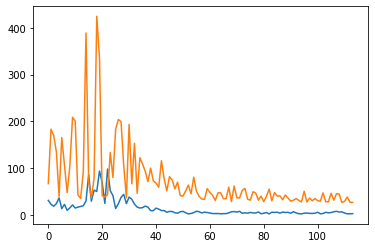

In [39]:
pyplot.plot(history.history['loss'][6:], label='train')
pyplot.plot(history.history['val_loss'][6:], label='test')